# Iniciación en Python con Aplicaciones en Aceración (module 01)

**Dr. Edgar Ivan Castro Cedeño**

[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from scipy.optimize import fsolve
import src.deox as deox # funciones propias

# 4. Diagrama de estabilidad de inclusiones en el sistema Fe-Mg-Al-O

## 4.1 Reacciones de equilibrio

### 4.1.1 Inclusiones de $\mathrm{Al_2O_3}$

$$ \mathrm{\left( Al_{2}O_{3}\right) = 2 \left[Al\right] + 3 \left[O\right]} $$

$$K_{Al} = \frac{h_{Al}^2  h_{O}^3}{a_{Al_2O_3}}$$

$$ \log K = 2 \log h_{Al} + 3 \log h_{O} - \log a_{Al_2O_3} $$

Considerando el formalismo de parámetros de interacción de Wagner:

$$ \log K_{Al} = 2 \log f_{Al} + 2 \log \left[\%Al\right] + 3 \log f_{O} + 3 \log \left[\%O \right] - \log a_{Al_2O_3} $$

$$ \log K_{Al} = -\frac{45300}{T} + 11.62 $$


### 4.1.2 Inclusiones de $\mathrm{MgO}$

$$\mathrm{\left( MgO\right) =  \left[Mg\right] +  \left[O\right]}$$


$$K_{Mg} = \frac{h_{Mg}  h_{O}}{a_{MgO}}$$

$$ \log K_{Mg} = \log h_{Mg} + \log h_{O} - \log a_{MgO} $$

Considerando el formalismo de parámetros de interacción de Wagner:

$$ \log K_{Mg} = \log f_{Mg} + \log \left[\%Mg\right] +  \log f_{O} +  \log \left[\%O \right] - \log a_{MgO} $$

$$ \log K_{Mg} = -\frac{4700}{T} - 4.28 $$

### 4.1.3 Inclusiones de $\mathrm{MgO \cdot Al_2O_3}$

$$ \mathrm{\left( MgO \cdot Al_2O_3\right) = 2 \left[Al\right] + \left[Mg\right] + 4 \left[O\right]} $$

$$ K_{spinel} = \frac{h_{Al}^2 h_{Mg}  h_{O}^4}{a_{MgO \cdot Al_2O_3}}$$

$$\log K_{spinel} = 2 \log h_{Al} + \log h_{mg} + 4 \log h_{O} - \log{a_{MgO \cdot Al_2O_3}}$$

Considerando el formalismo de parámetros de interacción de Wagner:

$$ \log K_{spinel} = -\frac{51083.2}{T} + 6.736 $$

$$ \log K_{spinel} = 2 \log f_{Al} + 2 \log \left[\%Al\right] + \log f_{Mg} +  \log \left[\%Mg\right] + 4 \log f_{O} + 4 \log \left[\%O \right] - \log a_{MgO \cdot Al_2O_3} $$

## 4.2 Tratamiento termodinámico mediante formalismo de Wagner

La dependencia entre el coeficiente de actividad de los solutos y la composición química se puede cuantificar mediante el formalismo de parámetros de interacción de [Wagner](https://www.jstage.jst.go.jp/article/isijinternational1966/28/3/28_3_153/_pdf).

$$ \log f_i = \sum\limits_{j=2}^{n}{e_i^j \left[\%j\right]} 
        + \sum\limits_{j=2}^n{r_i^j \left[ \%j\right]^2} 
        + \sum\limits_{j=2}^{n-1} \sum\limits_{k>j}^{n} {r_i^{j,k} \left[\%j\right]\left[\%k\right]}$$

donde:
- $f_i$: Coeficiente de actividad del soluto $i$.
- $e_i^j$: Parámetros de interacción de 1er orden para el soluto $i$ en presencia de otro soluto $j$.
- $r_i^j$: Parámetros de interacción de 2do orden para el soluto $i$ en presencia de otro soluto $j$.
- $r_i^{j,k}$: Parámetros de interacción de 2do orden para el soluto $i$ en presencia de solutos $j$, $k$.

**Cálculo de los logarítmos de los coeficientes de actividad, considerando parámetros de interacción de primer y segundo orden:**

$$\begin{bmatrix}\log f_{Al} \\ \log f_{Mg} \\ \log f_{O}\end{bmatrix}=\begin{bmatrix}e_{Al}^{Al} & e_{Al}^{Mg} & e_{Al}^{O} \\e_{Mg}^{Al}  & e_{Mg}^{Mg} & e_{Mg}^{O} \\e_{O}^{Al}  & e_{O}^{Mg}  & e_{O}^{O}\end{bmatrix}\begin{bmatrix}\left[\mathrm{\%Al}\right] \\ \left[\mathrm{\%Mg}\right] \\ \left[\mathrm{\%O}\right] \end{bmatrix}+\begin{bmatrix}r{Al}^{Al} & r_{Al}^{Mg} & r_{Al}^{O} \\r_{Mg}^{Al}  & r_{Mg}^{Mg} & r_{Mg}^{O} \\r_{O}^{Al}  & r_{O}^{Mg}  & r_{O}^{O}\end{bmatrix}\begin{bmatrix}\left[\mathrm{\%Al}\right]^2 \\ \left[\mathrm{\%Mg}\right]^2 \\ \left[\mathrm{\%O}\right]^2 \end{bmatrix}+\begin{bmatrix}r_{Al}^{Al,Mg} & r_{Al}^{Al,O} & r_{Al}^{Mg,O} \\r_{Mg}^{Al,Mg} & r_{Mg}^{Al,O} & r_{Mg}^{Mg,O} \\r_{O}^{Al,Mg}  & r_{O}^{Al,O}  & r_{O}^{Mg,O}\end{bmatrix}\begin{bmatrix}\left[\mathrm{\%Al}\right]\left[\mathrm{\%Mg}\right] \\ \left[\mathrm{\%Al}\right]\left[\mathrm{\%O}\right] \\ \left[\mathrm{\%Mg}\right]\left[\mathrm{\%O}\right] \end{bmatrix}$$

**Parámetros de interacción de primer orden, $e_i^j$**

$$ \begin{bmatrix}e_{Al}^{Al} & e_{Al}^{Mg} & e_{Al}^{O} \\e_{Mg}^{Al}  & e_{Mg}^{Mg} & e_{Mg}^{O} \\e_{O}^{Al}  & e_{O}^{Mg}  & e_{O}^{O}\end{bmatrix} =\begin{bmatrix}\frac{80.5}{T}         & -0.13 & 3.21 - \frac{9720}{T} \\3.21 - \frac{9720}{T}  &  0    & 958 - \frac{2.56\times10^{6}}{T} \\1.90 - \frac{5750}{T}  & 630 - \frac{1.705\times10^{6}}{T} & 0.76 - \frac{1750}{T}\end{bmatrix} $$

**Parámetros de interacción de segundo orden, $r_i^j$**

$$ \begin{bmatrix}r_{Al}^{Al} & r_{Al}^{Mg} & r_{Al}^{O} \\r_{Mg}^{Al}  & r_{Mg}^{Mg} & r_{Mg}^{O} \\r_{O}^{Al}  & r_{O}^{Mg}  & r_{O}^{O}\end{bmatrix} =\begin{bmatrix}0 & 0 & -107 - \frac{2.75\times10^{5}}{T} \\0 & 0 & -1.904\times10^{6} + \frac{4.22\times10^{9}}{T}\\0.0033 - \frac{25.0}{T} & 7.05\times10^{4} - \frac{1.696\times10^{8}}{T} & 0\end{bmatrix} $$

**Parámetros de interacción de segundo orden, $r_i^{j,k}$**

$$ \begin{bmatrix}r_{Al}^{Al,Mg} & r_{Al}^{Al,O} & r_{Al}^{Mg,O} \\r_{Mg}^{Al,Mg} & r_{Mg}^{Al,O} & r_{Mg}^{Mg,O} \\r_{O}^{Al,Mg}  & r_{O}^{Al,O}  & r_{O}^{Mg,O}\end{bmatrix} =\begin{bmatrix}0 & -0.021 - \frac{13.78}{T} & -260 \\0 & -230 & 2.143\times10^{5} - \frac{5.156\times10^{8}}{T} \\-150 & 127.3 + \frac{3.273\times10^{5}}{T} & -2.513\times10^{6} + \frac{5.573\times10^{9}}{T}\end{bmatrix} $$

## 4.3 Resolución numérica de las ecuaciones de equilibrio

### 4.3.1 Escritura de las ecuaciones de equilibrio para optimización numérica

En la librería de funciones propias `deox.py`, se han programado las funciones para optimización, `optFun_alumina`, `optFun_periclase`, `optFun_spinel`, que corresponden al cálculo respectivo de las tres ecuaciones que se muestran debajo.

$$ \varepsilon_{Al_2O_3} = 2 \log f_{Al} + 2 \log \left[\%Al\right] + 3 \log f_{O} + 3 \log \left[\%O \right] - \log a_{Al_2O_3} + \frac{45300}{T} - 11.62 $$

$$ \varepsilon_{MgO} = \log f_{Mg} +  \log \left[\%Mg\right] + \log f_{O} + \log \left[\%O \right] - \log a_{MgO} + \frac{4700}{T} + 4.28$$

$$ \varepsilon_{spinel} = 2 \log f_{Al} + 2 \log \left[\%Al\right] + \log f_{Mg} +  \log \left[\%Mg\right] + 4 \log f_{O} + 4 \log \left[\%O \right] - \log a_{MgO \cdot Al_2O_3} +\frac{51083.2}{T} - 6.736 $$

### 4.3.2 Procedimiento de optimización numérica de las ecuaciones de equilibrio

La optimización numérica para encontrar la combinación de parámetros de tal forma que $\varepsilon \rightarrow 0$ se lleva a cabo utilizando la función `fsolve` de la librería `scipy.optimize`.

Debajo se muestra un ejemplo 

In [2]:
# parámetros de entrada
pctAl = 0.03   # contenido de Al, wt%
pctMg = 0.0001 # contenido de Mg, wt%
pctO = np.linspace(0.0001, 0.002, 50) # contenido de O, wt%
T = 1873 # Temperatura, K
aOx = 1 # actividad de producto de desoxidación
order = 2 # orden considerado para parámetros de interacción

In [3]:
### docstrings de funciones (comentar/descomentar lineas)
help(deox.optFun_alumina)
#help(deox.optFun_MgO)
#help(deox.optFun_spinel)

Help on function optFun_alumina in module src.deox:

optFun_alumina(pctO: float, *params: list) -> float
    Thermodynamic equilibrium Al-O
    Activity coefficients calculated with none, only first order, or
    first and second order interaction coefficients
    
    logK = 2*log(fAl) + 2*log[%Al] + 3*log(fO) + 3*log[%O] - log(a_Al2O3)
    
    log(fAl) = e_Al_Al*[%Al] + e_Al_Mg*[%Mg] + e_Al_O*[%O]                      + r_Al_Al*[%Al]**2 + r_Al_Mg*[%Mg]**2 + r_Al_O*[%O]**2              + r_Al_AlMg*[%Al]*[%Mg] + r_Al_AlO*[%Al]*[%O] + r_Al_MgO*[%Mg][%O]
             
    log(fO) = e_O_Al*[%Al] + e_O_Mg*[%Mg] + e_O_O*[%O]              + r_O_Al*[%O]**2 + r_O_Mg*[%Mg]**2 + r_O_O*[%O]**2             + r_O_AlMg*[%Al]*[%Mg] + r_O_AlO[%Al]*[%O] + r_O_MgO*[%Mg][%O]
    
    Parameters
    ----------
    pctO : Float
        weight percent oxygen.
    *params : List or tuple
        pctAl: weight percent Aluminum
        pctMg: weight percent Magnesium
        T: Temperature in K.
        aMgO:

In [4]:
# cálculo de curvas de optimización
epsAl2O3 = deox.optFun_alumina(pctO, pctAl, pctMg, T, aOx, order)
epsMgO = deox.optFun_periclase(pctO, pctMg, pctMg, T, aOx, order)
epsSpinel = deox.optFun_spinel(pctO, pctAl, pctMg, T, aOx, order)

# buscar raices para las curvas de optimización
optAl2O3 = fsolve(deox.optFun_AlO, x0=1e-8, args=(pctAl, T, aOx, order))
optMgO = fsolve(deox.optFun_MgO, x0=1e-8, args=(pctMg, T, aOx, order))
optSpinel = fsolve(deox.optFun_spinel, x0=1e-8, args=(pctAl, pctMg, T, aOx, order))

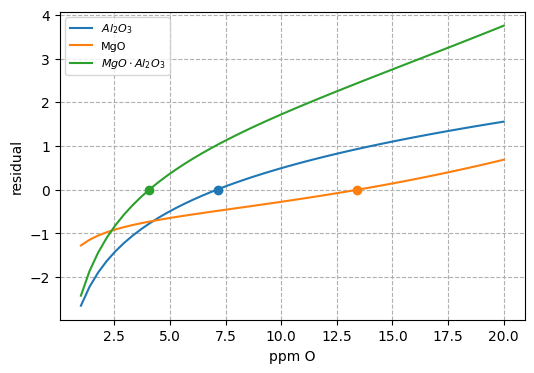

In [5]:
# gráfico de curvas de optimización
    
fig, ax = plt.subplots(figsize=(6, 4))

# gráfico de curvas de optimización
ax.plot(1e4*pctO, epsAl2O3, color='C0', label=r'$Al_2O_3$')
ax.plot(1e4*pctO, epsMgO, color='C1', label=r'MgO')
ax.plot(1e4*pctO, epsSpinel, color='C2', label=r'$MgO \cdot Al_2O_3$')

# raices encontradas con un método numérico
ax.plot(1e4*optAl2O3[0], 0, ls='', marker='o', color='C0')
ax.plot(1e4*optMgO[0], 0, ls='', marker='o', color='C1')
ax.plot(1e4*optSpinel[0], 0, ls='', marker='o', color='C2')

# formato de gráfico
ax.set(xlabel='ppm O', ylabel='residual')
ax.legend(fontsize=8)
ax.grid(ls='--', which='both')
plt.show()

## 4.4 Superficies de equilibrio para productos individuales

### 4.4.1 Cálculo de superficies de equilibrio

El objetivo es visualizar el contenido de oxígeno en equilibrio sobre una superficie que combine contenido de aluminio y magnesio.

In [6]:
# Parámetros de entrada
T = 1873 # temperatura  [K]
Alpcts = np.logspace(-5, 1, 200)
Mgpcts = np.logspace(-5, -1, 200)
aOx = 1 # actividad termodinámica de producto de desoxidación
order = 2 # orden parámetros interacción
thres = 1 # umbral de corte

In [7]:
# listas para guardar resultados de cálculos
oxAlumina, oxPericlase, oxSpinel = [], [], []
oxides = [oxAlumina, oxPericlase, oxSpinel]

In [8]:
# lista con funciones a optimizar
funcs = [deox.optFun_alumina, deox.optFun_periclase, deox.optFun_spinel]

In [9]:
# cálculo de equilibrios de desoxidación

for ox, func in zip(oxides, funcs):
    for Alpct in Alpcts:
        for Mgpct in Mgpcts:
            params = (Alpct, Mgpct, T, aOx, order)
            # calculo individual
            Opct = fsolve(func, x0=1e-8, args=params)
            ox.append(float(Opct[0]))

In [10]:
# transformar listas de resultados a arrays
oxAlumina = np.array(oxAlumina)
oxPericlase = np.array(oxPericlase)
oxSpinel = np.array(oxSpinel)

In [11]:
# transformar resultados de [%O] a [ppm O]
oxAlumina = 1e4 * oxAlumina
oxPericlase = 1e4 * oxPericlase
oxSpinel = 1e4 * oxSpinel

### 4.4.2 Visualización de superficies en 3D

In [12]:
# Parámetros de malla para gráficos
AL, MG = np.meshgrid(np.log10(Alpcts), np.log10(Mgpcts))

In [13]:
# dimensionar arrays de resultados con respecto a malla
oxAlumina = np.reshape(oxAlumina, shape=np.shape(AL)).T
oxPericlase = np.reshape(oxPericlase, shape=np.shape(AL)).T
oxSpinel = np.reshape(oxSpinel, shape=np.shape(AL)).T

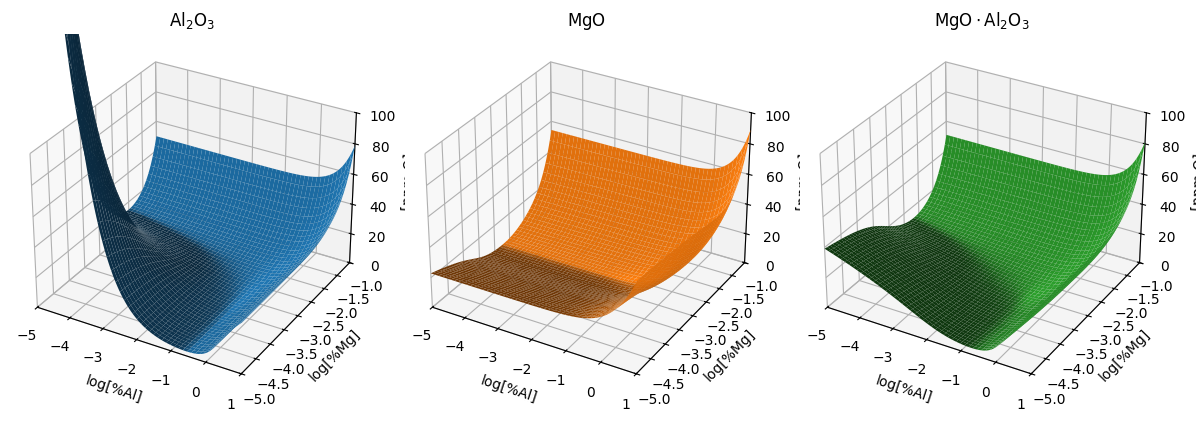

In [14]:
fig, axes = plt.subplots(ncols=3, figsize=(12,4), subplot_kw={"projection": "3d"})

# graficos
axes[0].plot_surface(AL, MG, oxAlumina, color='C0')
axes[1].plot_surface(AL, MG, oxPericlase, color='C1')
axes[2].plot_surface(AL, MG, oxSpinel, color='C2')

# formato
axes[0].set_title(r'$\mathrm{Al_2O_3}$')
axes[1].set_title(r'$\mathrm{MgO}$')
axes[2].set_title(r'$\mathrm{MgO \cdot Al_2O_3}$')
for ax in axes:
    ax.set(xlim=(-5, 1), xlabel='log[%Al]',
           ylim=(-5, -1), ylabel='log[%Mg]',
           zlim=(0, 100), zlabel='[ppm O]')
fig.tight_layout()
plt.show()

### 4.4.3 Visualización de superficies como gráficos de contornos

In [15]:
# Parámetros de malla para gráficos
AL, MG = np.meshgrid(np.log10(Alpcts), np.log10(Mgpcts))

In [16]:
# dimensionar arrays de resultados con respecto a malla
oxAlumina = np.reshape(oxAlumina, newshape=np.shape(AL))
oxPericlase = np.reshape(oxPericlase, newshape=np.shape(AL))
oxSpinel = np.reshape(oxSpinel, newshape=np.shape(AL))

/tmp/ipykernel_37047/3466343591.py:2: DeprecationWarning: `newshape` keyword argument is deprecated, use `shape=...` or pass shape positionally instead. (deprecated in NumPy 2.1)
  oxAlumina = np.reshape(oxAlumina, newshape=np.shape(AL))
/tmp/ipykernel_37047/3466343591.py:3: DeprecationWarning: `newshape` keyword argument is deprecated, use `shape=...` or pass shape positionally instead. (deprecated in NumPy 2.1)
  oxPericlase = np.reshape(oxPericlase, newshape=np.shape(AL))
/tmp/ipykernel_37047/3466343591.py:4: DeprecationWarning: `newshape` keyword argument is deprecated, use `shape=...` or pass shape positionally instead. (deprecated in NumPy 2.1)
  oxSpinel = np.reshape(oxSpinel, newshape=np.shape(AL))


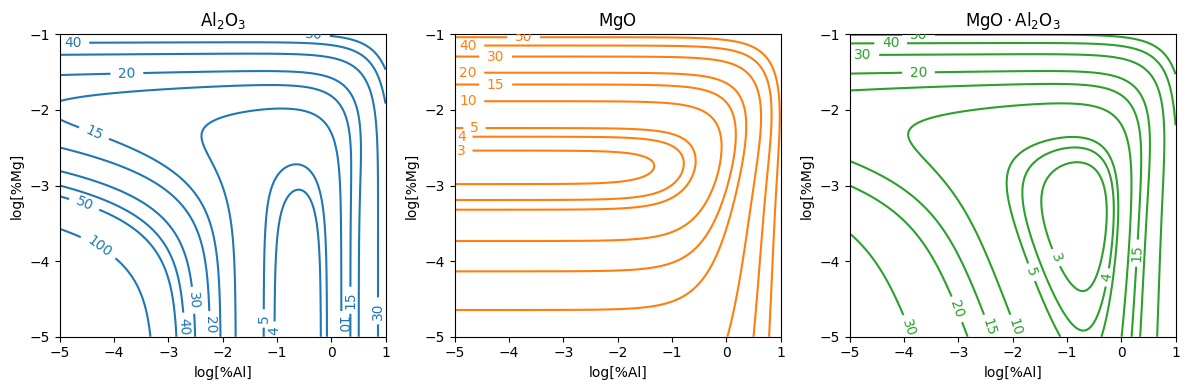

In [17]:
fig, axes = plt.subplots(ncols=3, figsize=(12,4))

# niveles para las curvas
levels = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50, 100]

# graficos
surf0 = axes[0].contour(AL, MG, oxAlumina, colors='C0', levels=levels)
axes[0].clabel(surf0)
surf1 = axes[1].contour(AL, MG, oxPericlase, colors='C1', levels=levels)
axes[1].clabel(surf1)
surf2 = axes[2].contour(AL, MG, oxSpinel, colors='C2', levels=levels)
axes[2].clabel(surf2)

# formato
axes[0].set_title(r'$\mathrm{Al_2O_3}$')
axes[1].set_title(r'$\mathrm{MgO}$')
axes[2].set_title(r'$\mathrm{MgO \cdot Al_2O_3}$')
for ax in axes:
    ax.set(xlim=(-5, 1), xlabel='log[%Al]', xticks=range(-5, 2),
           ylim=(-5, -1), ylabel='log[%Mg]', yticks=range(-5, 0)
    )
fig.tight_layout()
plt.show()

## 4.5 Construcción de diagrama de estabilidad de óxidos

### 4.5.1 Construcción de la superficie de estabilidad

El diagrama de estabilidad de óxidos se construye al combinar las superficies cálculadas en la sección anterior. 

El criterio termodinámico para la construcción del diagrama [[Ref.1](https://link.springer.com/article/10.1007%2Fs11663-015-0361-7)] [[Ref.2](https://www.sciencedirect.com/science/article/pii/S2238785421001873)] es el siguiente:

- Cada área en el diagrama está gobernada por un tipo único óxido.
- La superficie que le corresponde es la que tenga menor energía libre.
- Esto corresponde a la superficie con el menor contenido de oxígeno.

In [18]:
### Encontrar oxígenos mínimos entre las tres superficies
oxMin = np.minimum(oxAlumina, oxPericlase)
oxMin = np.minimum(oxMin, oxSpinel)

### 4.5.2 Visualización de la superficie en 3D

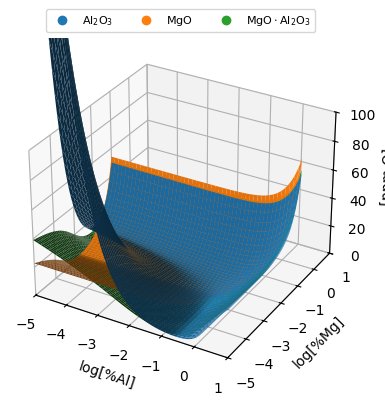

In [19]:
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw={"projection": "3d"})

oxides = [oxAlumina, oxPericlase, oxSpinel]
colors = ['C0', 'C1', 'C2']
for oxide, color in zip(oxides, colors):
    ax.plot_surface(AL, MG, oxide, color=color)

# formato
ax.set(xlim=(-5, 1), xlabel='log[%Al]',
        ylim=(-5, 1), ylabel='log[%Mg]',
        zlim=(0, 100), zlabel='[ppm O]')
# leyenda
l0 = ax.plot([],[], ls='', marker='o', color='C0', label=r"$\mathrm{Al_2O_3}$")
l1 = ax.plot([], [], ls='', marker='o', color='C1', label=r"$\mathrm{MgO}$")
l2 = ax.plot([], [], ls='', marker='o', color='C2', label=r"$\mathrm{MgO \cdot Al_2O_3}$" )
ax.legend(ncol=3, fontsize=8, loc='lower center', bbox_to_anchor=(0.5, 1))

fig.tight_layout()
plt.show()

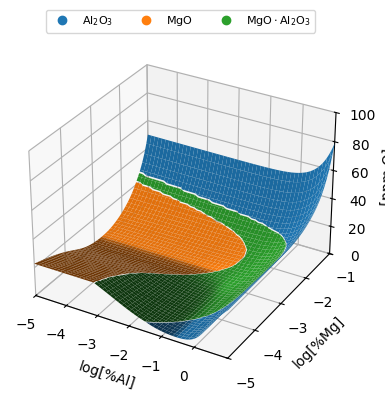

In [20]:
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw={"projection": "3d"})

oxides = [oxAlumina, oxPericlase, oxSpinel]
colors = ['C0', 'C1', 'C2']

for oxide, color in zip(oxides, colors):

    # filtrar los datos de cada serie, para graficarlos en color
    foo = oxide.copy()
    foo = foo * [foo <= oxMin] # filtro booleano (1: mínimo, 0: != mínimo)
    foo[foo == 0] = np.nan # limpiar ceros (oxígeno no era el mínimo)
    foo = np.squeeze(foo) # reducir dimensiones de 3 a 2.
    
    # graficar
    ax.plot_surface(AL, MG, foo, color=color)

# formato
ax.set(xlim=(-5, 1), xlabel='log[%Al]', xticks=range(-5, 1),
        ylim=(-5, -1), ylabel='log[%Mg]', yticks=range(-5, 0),
        zlim=(0, 100), zlabel='[ppm O]')
# leyenda
l0 = ax.plot([],[], ls='', marker='o', color='C0', label=r"$\mathrm{Al_2O_3}$")
l1 = ax.plot([], [], ls='', marker='o', color='C1', label=r"$\mathrm{MgO}$")
l2 = ax.plot([], [], ls='', marker='o', color='C2', label=r"$\mathrm{MgO \cdot Al_2O_3}$" )
ax.legend(ncol=3, fontsize=8, loc='lower center', bbox_to_anchor=(0.5, 1))

fig.tight_layout()
plt.show()

### 4.5.3 Visualización de la superficie como gráfico de contornos

Los isocontornos de oxígeno de la superficie de estabilidad se pueden visualizar directamente al graficar la superficie de óxigeno mínimo que se cálculo arriba.

In [21]:
AL, MG = np.meshgrid(np.log10(Alpcts), np.log10(Mgpcts))

Se utiliza la función `draw_log_scales`, de la librería de funciones propias `deox.py`, para trazar una malla logarítmica en la gráfica.

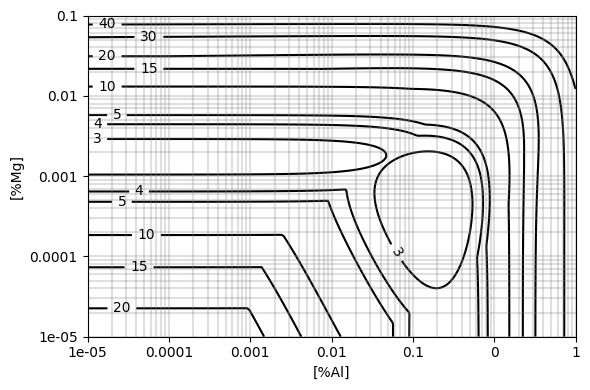

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))

# curvas de nivel
levels = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40]
C0 = ax.contour(AL, MG, oxMin, colors='k', levels=levels)
ax.clabel(C0)
deox.draw_log_scales(-5, 1, ax=ax, axis=0, color='gray')
deox.draw_log_scales(-5, -1, ax=ax, axis=1, color='gray')

# formato
ax.set(xlim=(-5, 1), xlabel='[%Al]',
       ylim=(-5, -1), ylabel='[%Mg]',
       xticks=range(-5,2), yticks=range(-5,0),
       xticklabels=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0, 1],
       yticklabels=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1])

fig.tight_layout()
plt.show()

Es deseable incluir en el diagrama la delimitación de las regiones que corresponden a cada uno de los productos de desoxidación.

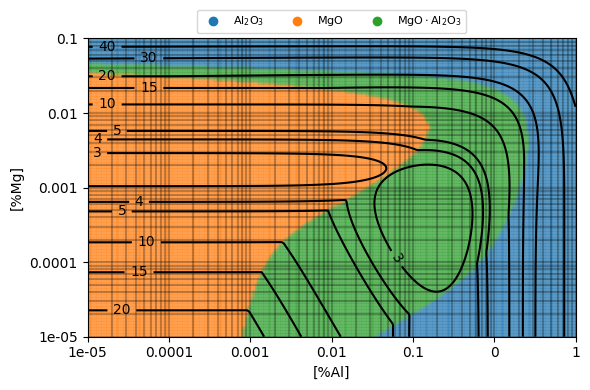

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))

oxides = [oxAlumina, oxPericlase, oxSpinel]
colors = ['C0', 'C1', 'C2']

# zonas coloreadas 
for oxide, color in zip(oxides, colors):
    # filtrar los datos de cada serie, para graficarlos en color
    foo = oxide.copy()
    foo = foo * [foo <= oxMin] # filtro booleano (1: mínimo, 0: != mínimo)
    foo[foo == 0] = np.nan # limpiar ceros (oxígeno no era el mínimo)
    foo = np.squeeze(foo) # reducir dimensiones de 3 a 2.
    # graficar puntos en donde contenido de oxígeno es mínimo
    cropAL = AL[~np.isnan(foo)]
    cropMG = MG[~np.isnan(foo)]
    ax.plot(cropAL, cropMG, ls='', marker='.', color=color, alpha=0.15)

# curvas de nivel
levels = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40]
C0 = ax.contour(AL, MG, oxMin, colors='k', levels=levels)
ax.clabel(C0)
deox.draw_log_scales(-5, 1, ax=ax, axis=0, color='black')
deox.draw_log_scales(-5, -1, ax=ax, axis=1, color='black')


# formato
ax.set(xlim=(-5, 1), xlabel='[%Al]',
       ylim=(-5, -1), ylabel='[%Mg]',
       xticks=range(-5,2), yticks=range(-5,0),
       xticklabels=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0, 1],
       yticklabels=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1])

# leyenda
l0 = ax.plot([],[], ls='', marker='o', color='C0', label=r"$\mathrm{Al_2O_3}$")
l1 = ax.plot([], [], ls='', marker='o', color='C1', label=r"$\mathrm{MgO}$")
l2 = ax.plot([], [], ls='', marker='o', color='C2', label=r"$\mathrm{MgO \cdot Al_2O_3}$" )
ax.legend(ncol=3, fontsize=8, loc='lower center', bbox_to_anchor=(0.5, 1))

fig.tight_layout()
plt.show()

## 4.6 Referencias

[[Ref.1](https://link.springer.com/article/10.1007%2Fs11663-015-0361-7)]
Zhang, L., Ren, Y., Duan, H., Yang, W., & Sun, L. (2015).   
Stability diagram of Mg-Al-O system inclusions in molten steel.    
Metallurgical and Materials Transactions B, 46(4), 1809-1825.   

[[Ref.2](https://www.sciencedirect.com/science/article/pii/S2238785421001873)]
Wang, H., Yu, P., Zhou, X., Wang, Y., & Lv, X. (2021).   
Three-dimensional stability diagram of Al–Mg–O inclusions in molten steel.    
Journal of Materials Research and Technology, 12, 43-52.

[[Ref.3](https://www.jstage.jst.go.jp/article/isijinternational1966/28/3/28_3_153/_pdf)]
Ichise, E., & Moro-Oka, A. (1988).   
Interaction Parameter in Liquid Iron Alloys.    
Transactions of the Iron and Steel Institute of Japan, 28(3), 153-163.   

[[Ref.4](https://www.researchgate.net/publication/233686082_The_Thermodynamics_of_Liquid_Dilute_Iron_Alloys)]
Sigworth, G. K., & Elliott, J. F. (1974).    
The thermodynamics of liquid dilute iron alloys.    
Metal science, 8(1), 298-310.     

[[Ref.5](https://link.springer.com/article/10.1007%2Fs11663-016-0640-y)]
Castro-Cedeño, E. I., Herrera-Trejo, M., Castro-Román, M., Castro-Uresti, F., & López-Cornejo, M. (2016).   
Evaluation of steel cleanliness in a steel deoxidized using Al.   
Metallurgical and Materials Transactions B, 47(3), 1613-1625.